# Setup and Getting Data

In [1]:
from google.colab import drive
drive.mount("/content/driveG")

Mounted at /content/driveG


In [2]:
#installing the necessary libraries
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 122.1/207.5 MB 178.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 10.2 MB/s eta 0:00:00
ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someon

In [3]:
!pip install torchinfo

In [4]:
!pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
Using cached nvidia_cublas_

In [5]:
!pip install torchmetrics -U mlxtend # Install torchmetrics and mlxtend here


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 55.2 MB/s eta 0:00:00


In [6]:
!pip install timm

In [7]:
#Setting up the necessary libraries
import torch
import torchvision
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
from torchinfo import summary  # For model summary
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
import timm


# Set manual seeds for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)


In [8]:
# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [9]:
# Path to the dataset inside Google Drive
train_dir = '/content/driveG/MyDrive/archive (1)/data/train'
test_dir = '/content/driveG/MyDrive/archive (1)/data/test' # Corrected path

In [10]:
# Verify that the images in the dataset is a valid image or not
import os
from PIL import Image

def remove_corrupt_images(directory):
    """
    Recursively remove corrupted image files from a directory.

    Args:
        directory (str): The path to the directory to check.
    """
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify that the file is a valid image
            except Exception as e:
                print(f"Corrupted file detected: {file_path}\nError: {e}")
                try:
                    os.remove(file_path)
                    print(f"Removed corrupted file: {file_path}")
                except Exception as remove_error:
                    print(f"Failed to remove file {file_path}. Error: {remove_error}")

# Run the removal on both training and testing directories:
remove_corrupt_images('/content/drive/MyDrive/archive (1)/data/train')
remove_corrupt_images('/content/drive/MyDrive/archive (1)/data/test')


In [11]:
def create_dataloaders(train_dir, test_dir, transform, batch_size):
    """
    Creates training and testing DataLoaders.
    """
    train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
    test_dataset  = datasets.ImageFolder(root=test_dir, transform=transform)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_dataloader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    class_names = train_dataset.classes
    return train_dataloader, test_dataloader, class_names


In [12]:
#Data preprocessing Pipeline
# Define BilateralFilter for noise reduction
class BilateralFilter:
    def __init__(self, diameter=5, sigma_color=50, sigma_space=50):
        self.diameter = diameter
        self.sigma_color = sigma_color
        self.sigma_space = sigma_space

    def __call__(self, img):
        img_np = np.array(img)
        # If RGB, convert to grayscale first
        if len(img_np.shape) == 3 and img_np.shape[2] == 3:
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
        filtered = cv2.bilateralFilter(img_np, d=self.diameter,
                                       sigmaColor=self.sigma_color,
                                       sigmaSpace=self.sigma_space)
        return Image.fromarray(filtered)




In [13]:
# Define the final transformation pipeline for CNN training.
# Images are kept as 1-channel grayscale.
data_transforms = transforms.Compose([
    BilateralFilter(diameter=5, sigma_color=50, sigma_space=50),  # Noise reduction
    transforms.RandomHorizontalFlip(p=0.5),                        # Augmentation: Flip
    transforms.RandomRotation(degrees=10),                         # Augmentation: Rotate
    transforms.Grayscale(num_output_channels=1),                   # Convert to 1-channel grayscale
    transforms.CenterCrop(200),                                    # Crop edges (adjust as needed)
    transforms.Resize((224, 224)),                                 # Resize to 224x224
    transforms.ToTensor(),                                         # Convert to tensor [0,1]
    transforms.Normalize(mean=[0.5], std=[0.5]) # Normalize to [-1,1] for 1 channel
])

In [14]:
# Create DataLoaders using our transformation pipeline
train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transforms,
    batch_size=32
)

In [15]:
#Patch Embedding
class PatchEmbedding(nn.Module):
    """
    Splits an image into patches, then flattens & projects them to an embedding.
    """
    def __init__(self, img_size=224, patch_size=16, in_chans=3, embed_dim=768):
        super().__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.in_chans = in_chans
        self.embed_dim = embed_dim

        # Number of patches
        self.num_patches = (img_size // patch_size) * (img_size // patch_size)

        # A Conv layer can act as patchify + flatten if we use stride=patch_size
        self.proj = nn.Conv2d(
            in_chans, embed_dim,
            kernel_size=patch_size,
            stride=patch_size
        )

    def forward(self, x):
        """
        x: [batch_size, in_chans, img_size, img_size]
        Returns: [batch_size, num_patches, embed_dim]
        """
        # Shape after proj: [batch_size, embed_dim, #patches across, #patches across]
        x = self.proj(x)  # [B, embed_dim, H/patch, W/patch]

        # Flatten spatial dims
        x = x.flatten(2)  # [B, embed_dim, num_patches]
        # Transpose so we have [B, num_patches, embed_dim]
        x = x.transpose(1, 2)
        return x


In [16]:
#Multi-Head Self-Attention Block
class MLPBlock(nn.Module):
    """
    A simple MLP block for the Transformer feed-forward.
    """
    def __init__(self, in_features, hidden_features=None, out_features=None):
        super().__init__()
        if not hidden_features:
            hidden_features = in_features
        if not out_features:
            out_features = in_features

        self.fc1 = nn.Linear(in_features, hidden_features)
        self.gelu = nn.GELU()
        self.fc2 = nn.Linear(hidden_features, out_features)

    def forward(self, x):
        x = self.fc1(x)
        x = self.gelu(x)
        x = self.fc2(x)
        return x

class TransformerEncoderBlock(nn.Module):
    """
    A single Transformer block: LayerNorm -> Multi-head Self-Attn -> Residual
                               -> LayerNorm -> MLP -> Residual
    """
    def __init__(self, embed_dim, num_heads, mlp_ratio=4.0, dropout=0.0):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout, batch_first=True)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.mlp = MLPBlock(
            in_features=embed_dim,
            hidden_features=int(embed_dim * mlp_ratio),
            out_features=embed_dim
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # x shape: [B, num_patches+1, embed_dim]

        # Self-Attention
        x_norm = self.norm1(x)
        attn_out, _ = self.attn(x_norm, x_norm, x_norm)  # batch_first=True => shape stays [B, seq, embed_dim]
        x = x + self.dropout(attn_out)  # Residual

        # MLP
        x_norm = self.norm2(x)
        mlp_out = self.mlp(x_norm)
        x = x + self.dropout(mlp_out)  # Residual

        return x


In [17]:
#Vision Transformer Class
class VisionTransformer(nn.Module):
    def __init__(
        self,
        img_size=224,
        patch_size=16,
        in_chans=3,
        num_classes=1,
        embed_dim=768,
        depth=12,
        num_heads=12,
        mlp_ratio=4.0,
        dropout=0.0
    ):
        super().__init__()
        self.patch_embed = PatchEmbedding(
            img_size=img_size,
            patch_size=patch_size,
            in_chans=in_chans,
            embed_dim=embed_dim
        )
        self.num_patches = self.patch_embed.num_patches

        # Class token: a learnable parameter that we prepend to patch embeddings
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))

        # Positional embedding: for each patch + 1 for cls token
        self.pos_embed = nn.Parameter(
            torch.zeros(1, self.num_patches + 1, embed_dim)
        )

        self.dropout = nn.Dropout(dropout)

        # Transformer Encoder blocks
        self.blocks = nn.ModuleList([
            TransformerEncoderBlock(
                embed_dim=embed_dim,
                num_heads=num_heads,
                mlp_ratio=mlp_ratio,
                dropout=dropout
            )
            for _ in range(depth)
        ])

        self.norm = nn.LayerNorm(embed_dim)

        # Final classification head
        self.head = nn.Linear(embed_dim, num_classes)

        # Weight init
        self._init_weights()

    def _init_weights(self):
        nn.init.normal_(self.cls_token, std=1e-6)
        nn.init.normal_(self.pos_embed, std=1e-6)
        nn.init.xavier_uniform_(self.head.weight)
        nn.init.normal_(self.head.bias, std=1e-6)

    def forward(self, x):
        """
        x: [B, in_chans, img_size, img_size]
        return: [B, num_classes] (for binary, num_classes=1 => single logit)
        """
        B = x.shape[0]

        # 1) Patch embedding
        x = self.patch_embed(x)  # [B, num_patches, embed_dim]

        # 2) Concatenate class token
        cls_tokens = self.cls_token.expand(B, -1, -1)  # [B, 1, embed_dim]
        x = torch.cat((cls_tokens, x), dim=1)  # [B, 1+num_patches, embed_dim]

        # 3) Add positional embeddings
        x = x + self.pos_embed[:, : x.size(1), :]
        x = self.dropout(x)

        # 4) Pass through Transformer blocks
        for blk in self.blocks:
            x = blk(x)

        # 5) Final normalization
        x = self.norm(x)

        # 6) Class token is the first token => x[:, 0]
        cls_token_final = x[:, 0]

        # 7) Classification head
        logits = self.head(cls_token_final)  # [B, num_classes]

        return logits


In [18]:
# Create a Vision Transformer from scratch
vit = VisionTransformer(
    img_size=224,
    patch_size=16,
    in_chans=3,
    num_classes=1,       # single logit
    embed_dim=768,
    depth=12,
    num_heads=12,
    mlp_ratio=4.0,
    dropout=0.1
).to(device)

# Example input: batch_size=1, 3-channel, 224x224
dummy_x = torch.randn(1, 3, 224, 224).to(device)
with torch.inference_mode():
    out = vit(dummy_x)
print("Output shape:", out.shape)  # [1, 1] -> single logit


Output shape: torch.Size([1, 1])


In [19]:
import torch.optim as optim
import time

loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(vit.parameters(), lr=1e-4)

def train_vit_scratch(model, train_loader, test_loader, epochs=5):
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}
    start = time.time()

    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_correct, total_train = 0, 0, 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device).float().unsqueeze(1)  # shape: [batch,1]
            optimizer.zero_grad()
            logits = model(X)
            loss = loss_fn(logits, y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * X.size(0)
            preds = (logits > 0).float()
            train_correct += (preds == y).sum().item()
            total_train += X.size(0)

        avg_train_loss = train_loss / total_train
        train_acc = train_correct / total_train

        # Evaluate
        model.eval()
        test_loss, test_correct, total_test = 0, 0, 0
        with torch.inference_mode():
            for X_test, y_test in test_loader:
                X_test, y_test = X_test.to(device), y_test.to(device).float().unsqueeze(1)
                test_logits = model(X_test)
                loss = loss_fn(test_logits, y_test)
                test_loss += loss.item() * X_test.size(0)
                test_preds = (test_logits > 0).float()
                test_correct += (test_preds == y_test).sum().item()
                total_test += X_test.size(0)

        avg_test_loss = test_loss / total_test
        test_acc = test_correct / total_test

        results["train_loss"].append(avg_train_loss)
        results["test_loss"].append(avg_test_loss)
        results["train_acc"].append(train_acc)
        results["test_acc"].append(test_acc)

        print(f"Epoch {epoch}/{epochs}: "
              f"Train Loss={avg_train_loss:.4f}, Train Acc={train_acc:.4f}, "
              f"Test Loss={avg_test_loss:.4f}, Test Acc={test_acc:.4f}")

    total_time = time.time() - start
    print(f"[INFO] Training completed in {total_time:.2f}s")
    return results



In [ ]:
results = train_vit_scratch(vit, train_dataloader, test_dataloader, epochs=15)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6522 | train_acc: 0.6217 | test_loss: 0.7059 | test_acc: 0.5240
Epoch: 2 | train_loss: 0.5771 | train_acc: 0.7188 | test_loss: 0.6775 | test_acc: 0.6289
Epoch: 3 | train_loss: 0.4955 | train_acc: 0.8931 | test_loss: 0.6536 | test_acc: 0.6406
Epoch: 4 | train_loss: 0.4496 | train_acc: 0.8898 | test_loss: 0.6277 | test_acc: 0.6752
Epoch: 5 | train_loss: 0.4102 | train_acc: 0.9326 | test_loss: 0.6270 | test_acc: 0.6239
Epoch: 6 | train_loss: 0.3819 | train_acc: 0.9211 | test_loss: 0.6113 | test_acc: 0.6646
Epoch: 7 | train_loss: 0.3634 | train_acc: 0.9391 | test_loss: 0.6144 | test_acc: 0.6546
Epoch: 8 | train_loss: 0.3225 | train_acc: 0.9638 | test_loss: 0.6076 | test_acc: 0.6646
Epoch: 9 | train_loss: 0.3049 | train_acc: 0.9671 | test_loss: 0.6048 | test_acc: 0.6842
Epoch: 10 | train_loss: 0.2927 | train_acc: 0.9688 | test_loss: 0.6182 | test_acc: 0.6719
Epoch: 11 | train_loss: 0.2856 | train_acc: 0.9507 | test_loss: 0.6100 | test_acc: 0.6802
Epoch: 12 | train_l

***

# Model Evaluation:


In [ ]:
results = {
    "train_loss": [...],
    "test_loss":  [...],
    "train_acc":  [...],
    "test_acc":   [...]
}


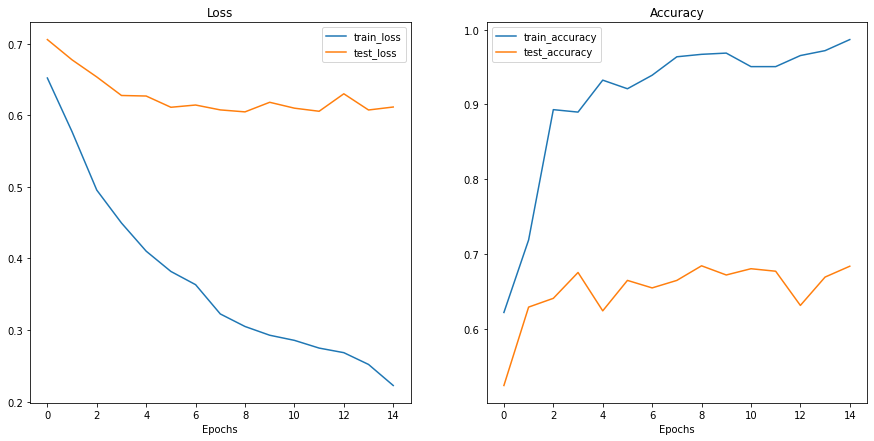

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(results["train_loss"], label="Train Loss")
plt.plot(results["test_loss"],  label="Test Loss")
plt.title("Train vs Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(results["train_acc"], label="Train Accuracy")
plt.plot(results["test_acc"],  label="Test Accuracy")
plt.title("Train vs Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


***

# Plotting the Confusion Matrix:

In [ ]:
!pip install torchmetrics -U mlxtend # we need mlxtend to plot the condusion matrix
import torchmetrics, mlxtend
print(f"mlxtend version {mlxtend.__version__}") # must be version 0.19.0 or higher

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
mlxtend version 0.21.0


In [ ]:
from tqdm.auto import tqdm
y_preds = []
y_targets = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions..."):
    X, y = X.to(device), y.to(device)
    y_targets.append(y.cpu())
    y_logit = model(X).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logit))
    y_preds.append(y_pred.cpu())

# concatenating all the prediction tensors into a single prediction tensor
y_pred_tensor = torch.cat(y_preds)
y_target_tensor = torch.cat(y_targets)
y_pred_tensor[:10], y_target_tensor[:10]

Making Predictions...:   0%|          | 0/8 [00:00<?, ?it/s]

(tensor([0., 1., 0., 0., 1., 0., 0., 0., 0., 0.]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

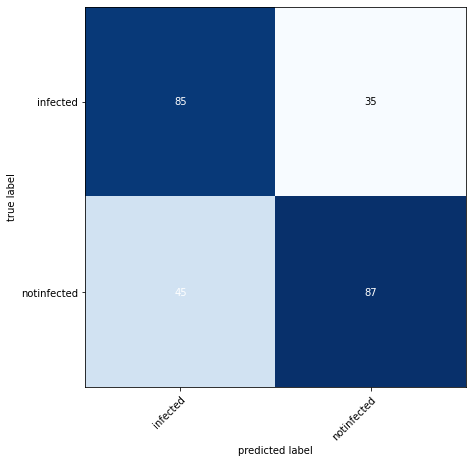

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task="binary", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_target_tensor)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

***